<a href="https://colab.research.google.com/github/NDominika/Project_heart/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WPROWADZENIE
Autorka: Dominika Nycz
 1. Informacje o oznaczenia w datasecie:
 * age - wiek pacjenta
 * sex - płeć pacjenta
 * cp - typ bólu w klatce piersiowej
  * 0 - typowy ból przy zawale
  * 1 - atypowy ból przy zawale
  * 2 - ból nieczęsty przy zawale
  * 3 - bezobjawowy
 * trtbps - ciśnienie spoczynkowe
 * chol - poziom cholesterolu podany w mg/dl
 * fbs - poziom cukru we krwi na czczo > 120 mg/dl ~ 1 = Prawda, 0 = Fałsz
 * restecg - spoczynkowe wyniki elektrokardiograficzne ~ 0 = Normal, 1 = nieprawidłowość załamka ST-T, 2 = przerost lewej komory
 * thalachh - maksymalne osiągnięte tętno
 * exng - ból wywołany ćwiczeniami ~ 1 = Tak, 0 = Nie
 * oldpeak - poprzedni szczyt
 * slp - nachylenie
 * caa - liczba głównych naczyń
 * thall - wynik testu obciążenia
 * output - zmienna docelowa

 2. Cel - przeanalizowanie danych i przewidzenie, czy dany pacjent ma skłanności ku zawałowi serca.

  


In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, KFold

#PRZYGOTOWANIE DANYCH
1. Wczytanie i wyświetlenie danych.

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/NDominika/Project_heart/main/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2. Usunięcie duplikatów.

In [54]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


3. Zmiana typu danych na float.

In [55]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trtbps    302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalachh  302 non-null    float64
 8   exng      302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    float64
 11  caa       302 non-null    float64
 12  thall     302 non-null    float64
 13  output    302 non-null    float64
dtypes: float64(14)
memory usage: 33.2 KB


#ANALIZA DANYCH
1. Stworzenie mapy korelacji danych

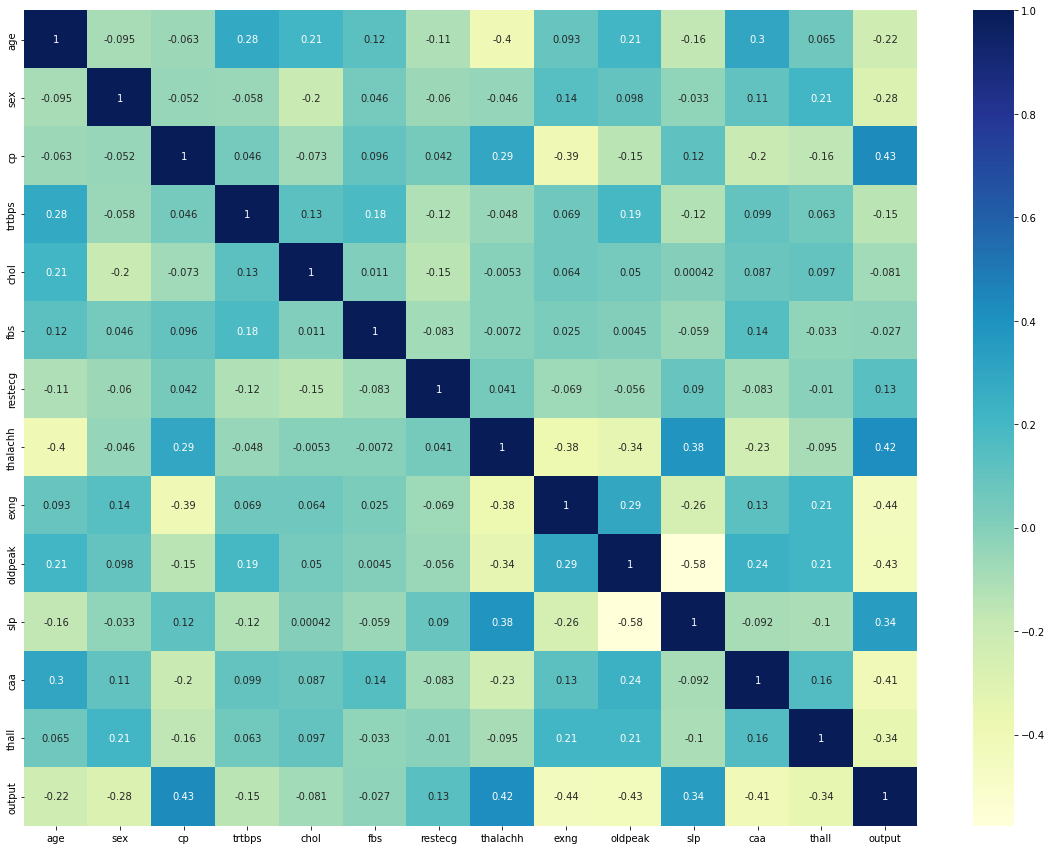

In [56]:
count_corr=df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(count_corr, cmap= 'YlGnBu', annot=True)

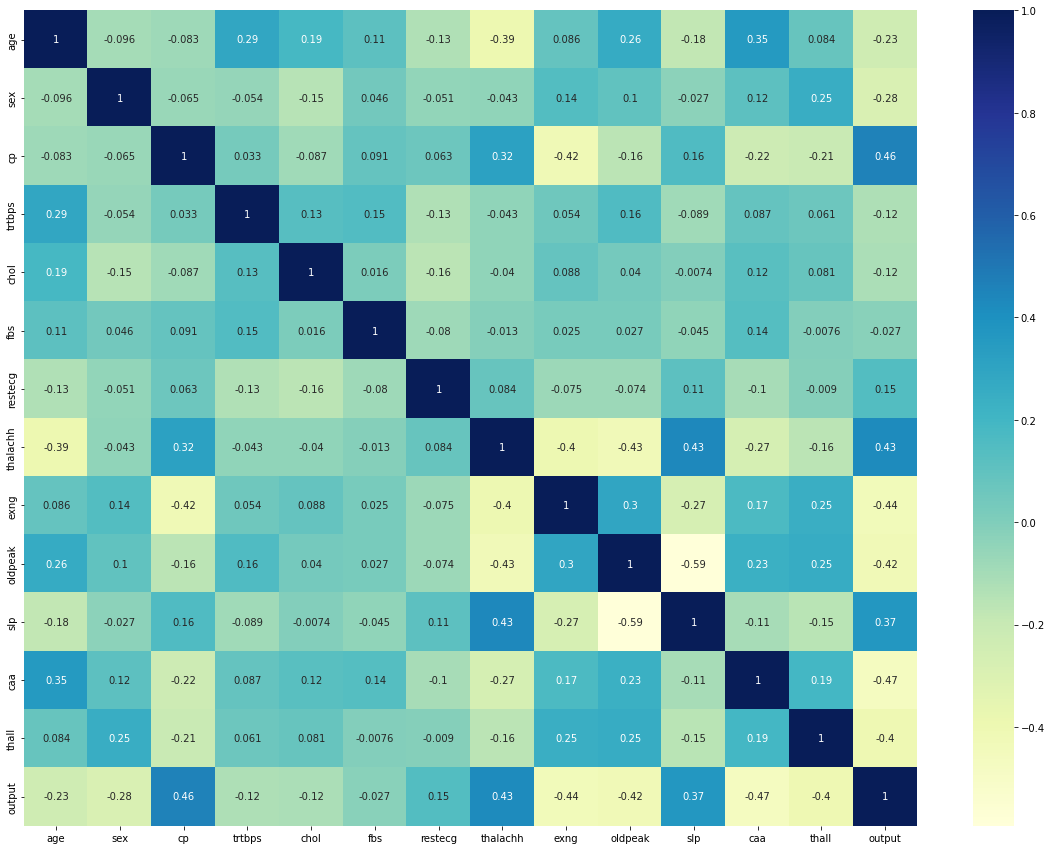

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='spearman'), cmap= 'YlGnBu', annot=True)

2. Stworzenie wykresów przedstawiających korelacje pomiędzy poszczególnymi kategoriami.

[]

<Figure size 1080x720 with 0 Axes>

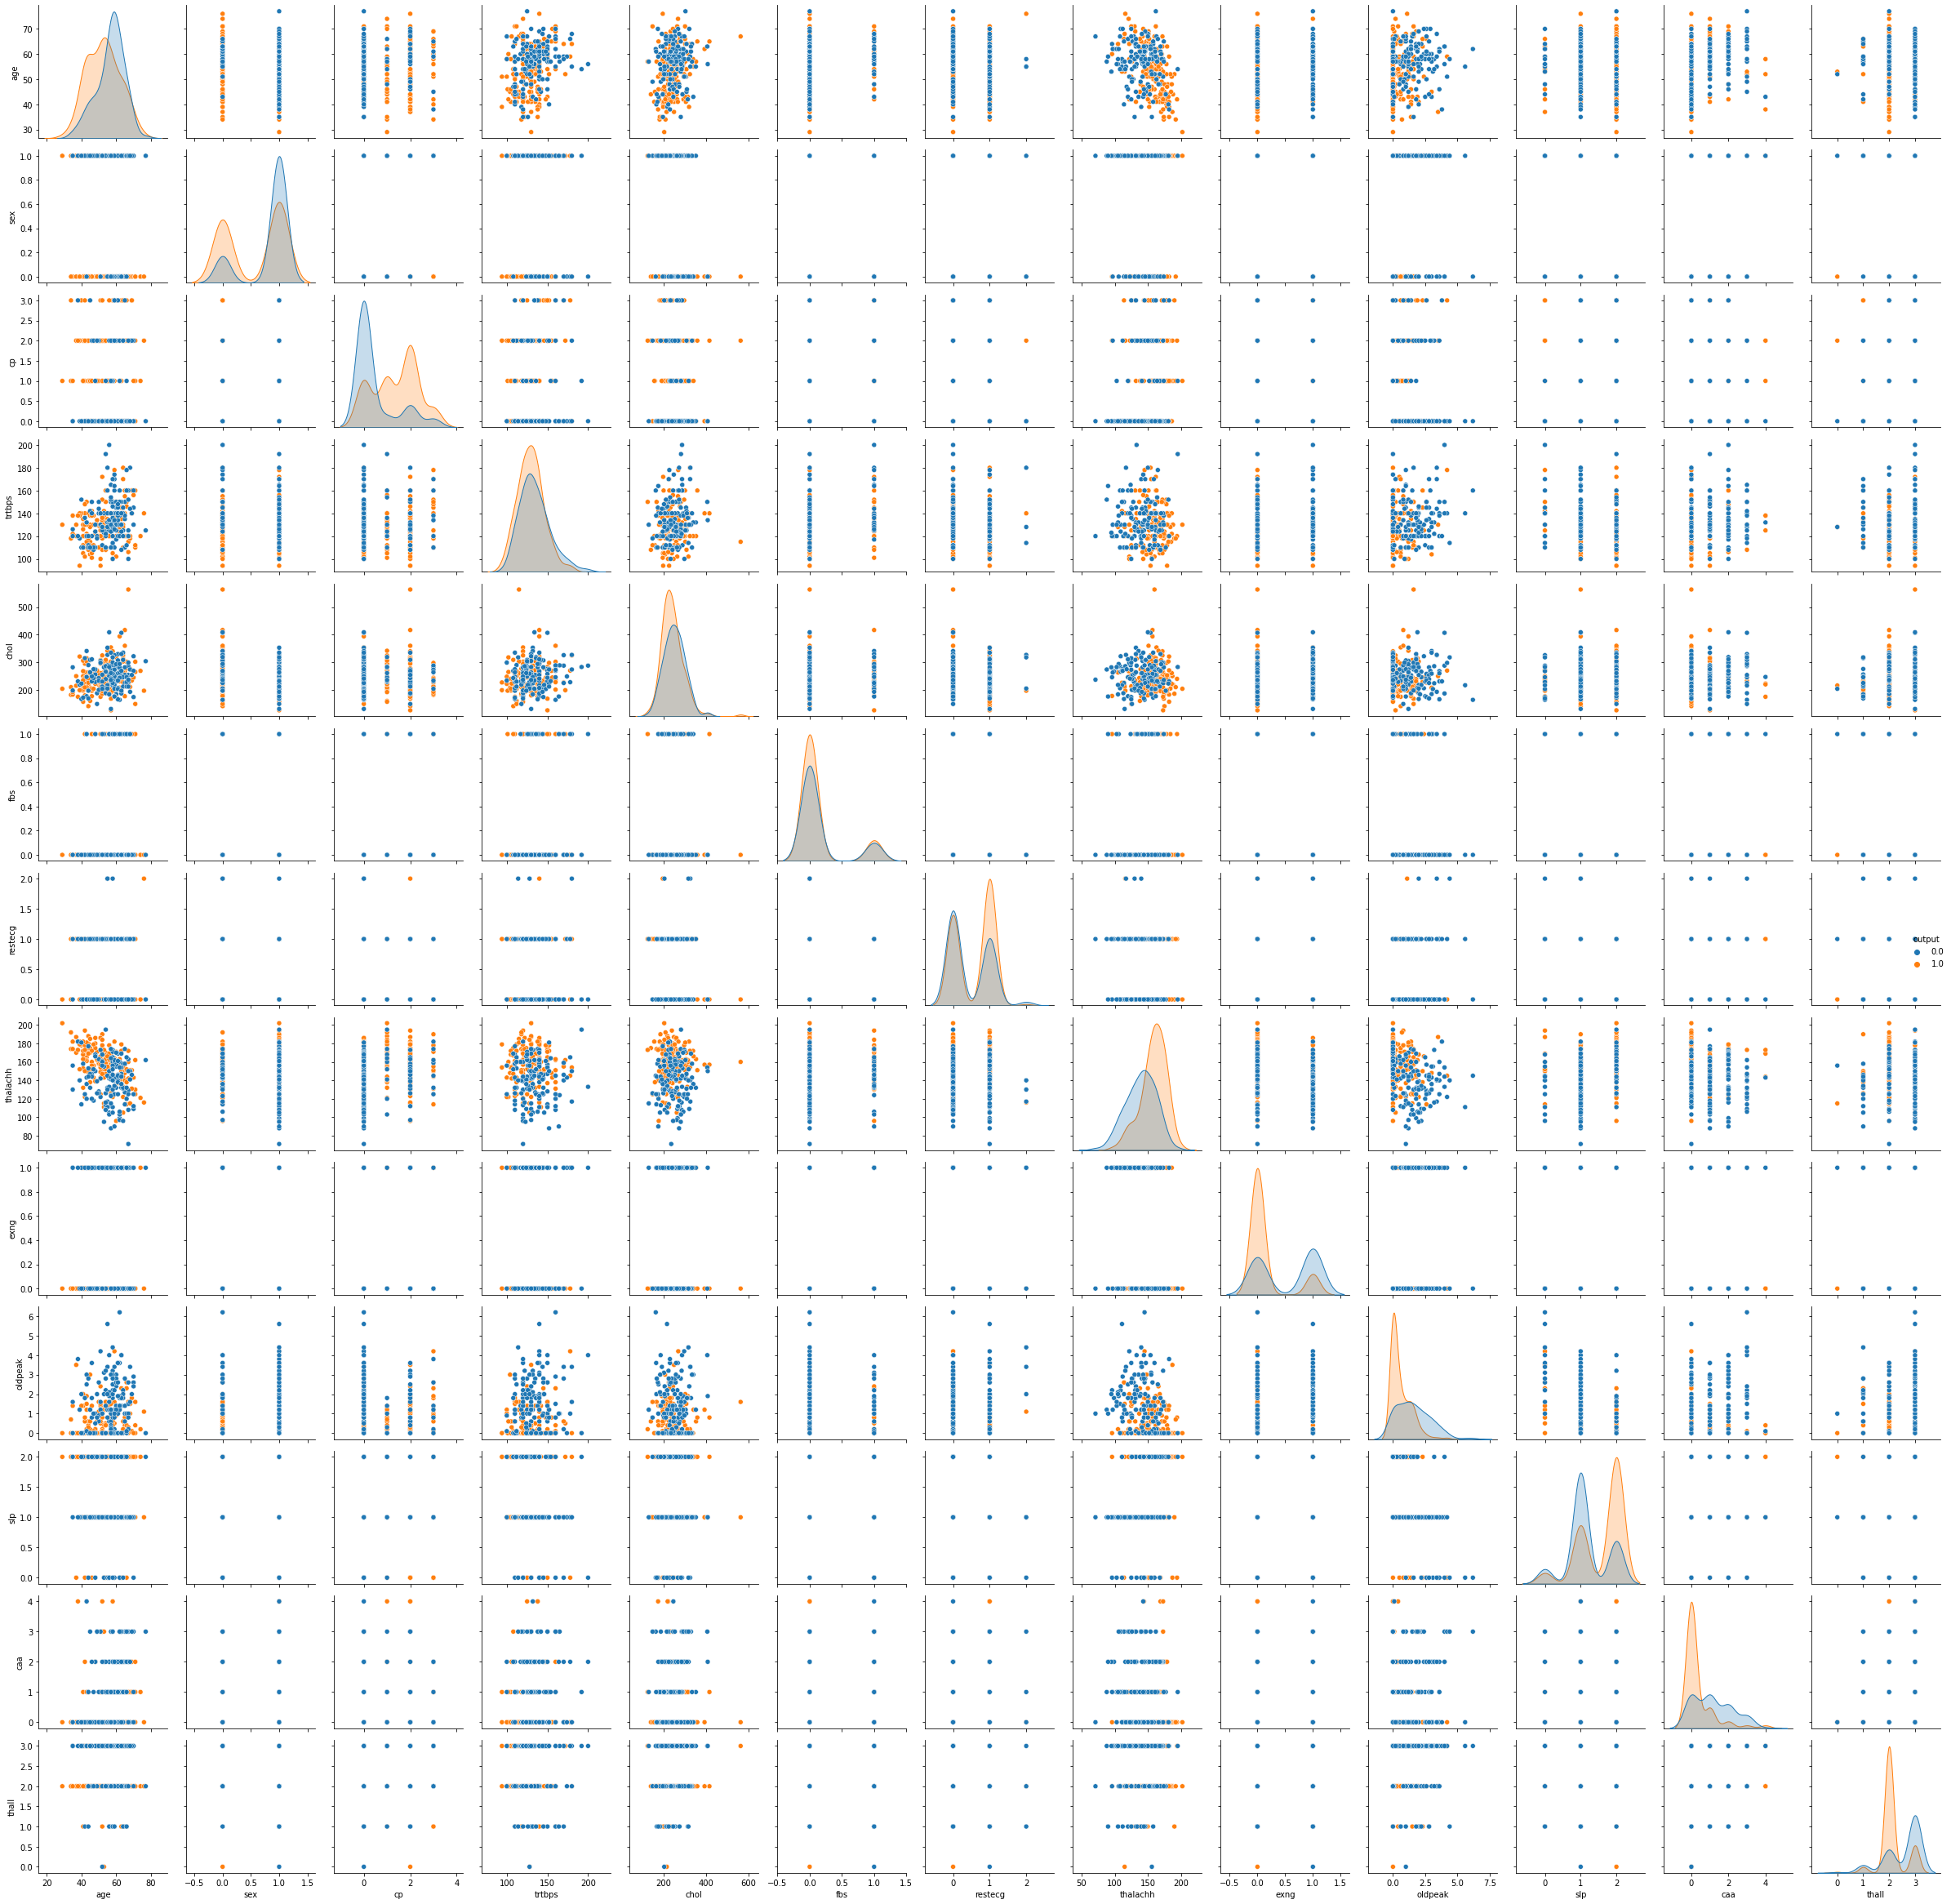

In [58]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue = 'output')
plt.tight_layout()
plt.plot()

#WSTĘPNE PRZETWARZANIE DANYCH
1. Utworzenie pierwszego zbioru danych z wybranych kategorii danych, pomiędzy którymi zachodzi największa korelacja.
2. Wyczyszczenie danych, by mogły one zostać poprawnie użyte w wybranych modelach predykcyjnych.


In [59]:
df_v1 = df[['cp', 'thalachh', 'slp', 'output', 'sex','exng','caa','cp','fbs','restecg','slp','thall']]
df_v1 = pd.get_dummies(df_v1, columns = ['sex','exng','caa','cp','fbs','restecg','slp','thall'])
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   thalachh     302 non-null    float64
 1   output       302 non-null    float64
 2   sex_0.0      302 non-null    uint8  
 3   sex_1.0      302 non-null    uint8  
 4   exng_0.0     302 non-null    uint8  
 5   exng_1.0     302 non-null    uint8  
 6   caa_0.0      302 non-null    uint8  
 7   caa_1.0      302 non-null    uint8  
 8   caa_2.0      302 non-null    uint8  
 9   caa_3.0      302 non-null    uint8  
 10  caa_4.0      302 non-null    uint8  
 11  cp_0.0       302 non-null    uint8  
 12  cp_1.0       302 non-null    uint8  
 13  cp_2.0       302 non-null    uint8  
 14  cp_3.0       302 non-null    uint8  
 15  cp_0.0       302 non-null    uint8  
 16  cp_1.0       302 non-null    uint8  
 17  cp_2.0       302 non-null    uint8  
 18  cp_3.0       302 non-null    uint8  
 19  fbs_0.0 

3. Podzielenie danych na zbiory testowe i treningowe.

In [60]:
y = df_v1['output'].values
df_v1x=df_v1.drop(['output'], axis=1)
X = df_v1x.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

4. Zdefiniowanie funkcji, której zadaniem będzie ocenienie poprawności otrzymanych wyników predykcyjnych za pomocą moted accuracy, F1-score oraz recall.

In [61]:
def calculate_metrics (X_train, X_test, y_train, y_test, model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    F1_train = f1_score(y_train, y_pred_train)
    F1_test = f1_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    wyniki = pd.DataFrame({'Accuracy':[acc_train, acc_test],
                      'F1':[F1_train, F1_test],
                      'Recall':[recall_train, recall_test]})
    wyniki.index=['train', 'test']
    return  wyniki

#MODELOWANIE
1. Zostosowanie wybranych modeli predykcyjnych do pierwszego zbioru danych.

       Accuracy        F1    Recall
train  0.858921  0.871212  0.884615
test   0.885246  0.895522  0.882353
       Accuracy        F1    Recall
train  0.958506  0.960630  0.938462
test   0.786885  0.793651  0.735294
       Accuracy        F1    Recall
train  0.738589  0.765799  0.792308
test   0.622951  0.656716  0.647059
       Accuracy        F1    Recall
train  0.688797  0.742268  0.830769
test   0.721311  0.779221  0.882353
       Accuracy        F1    Recall
train  0.937759  0.943396  0.961538
test   0.901639  0.911765  0.911765


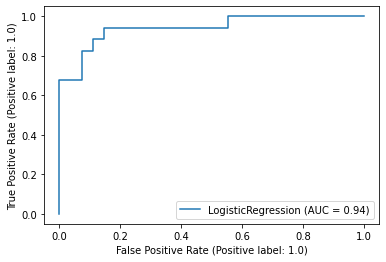

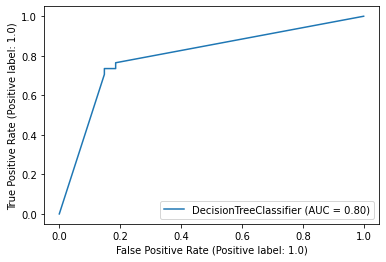

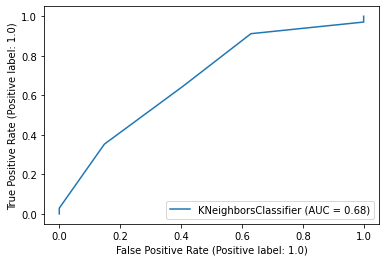

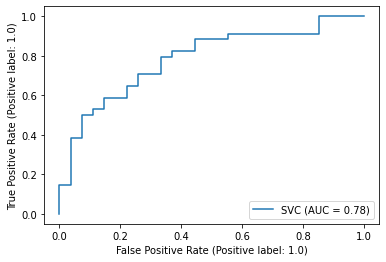

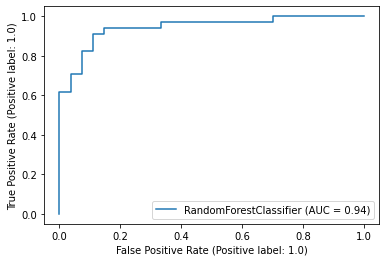

In [62]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

lr_v1 = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v1)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v1 = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v1)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v1 = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v1)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v1 = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v1)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v1 = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v1)
plot_roc_curve(rfc, X_test, y_test)

2. Zostosowanie wybranych modeli predykcyjnych wraz z kroswalidacją stratyfikowaną do pierwszego zbioru danych.

       Accuracy        F1   Recall
train  0.869863  0.883436  0.90566
test   0.900000  0.909091  1.00000
       Accuracy        F1    Recall
train   0.94863  0.952381  0.943396
test    0.80000  0.800000  0.800000
       Accuracy        F1    Recall
train  0.736301  0.768769  0.805031
test   0.700000  0.666667  0.600000
       Accuracy        F1    Recall
train   0.69863  0.751412  0.836478
test    0.70000  0.727273  0.800000
       Accuracy        F1    Recall
train  0.921233  0.928793  0.943396
test   0.900000  0.909091  1.000000


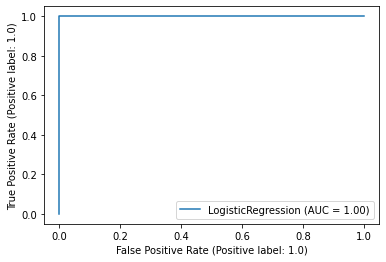

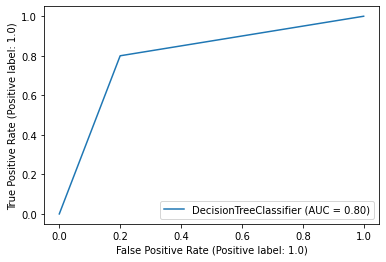

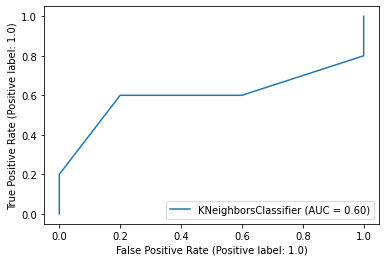

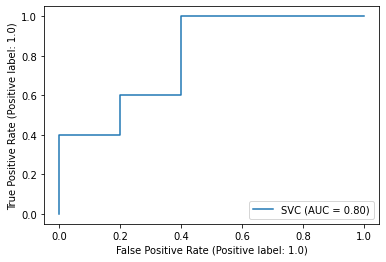

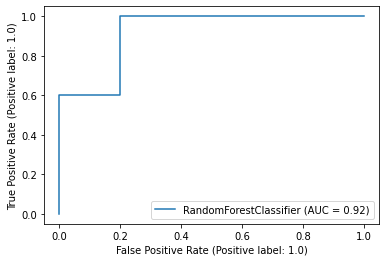

In [63]:
# Kroswalidacja stratyfikowana
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

lr_v1cv = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v1cv)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v1cv = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v1cv)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v1cv = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v1cv)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v1cv = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v1cv)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v1cv = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v1cv)
plot_roc_curve(rfc, X_test, y_test)

3. Zostosowanie wybranych modeli predykcyjnych wraz z kroswalidacją k-fold do
pierwszego zbioru danych.

       Accuracy        F1   Recall
train   0.87108  0.881029  0.88961
test    0.90000  0.909091  1.00000
       Accuracy        F1    Recall
train  0.954704  0.957377  0.948052
test   1.000000  1.000000  1.000000
       Accuracy        F1    Recall
train  0.773519  0.792332  0.805195
test   0.600000  0.600000  0.600000
       Accuracy        F1    Recall
train   0.69338  0.739645  0.811688
test    0.70000  0.727273  0.800000
       Accuracy        F1    Recall
train  0.930314  0.936306  0.954545
test   1.000000  1.000000  1.000000


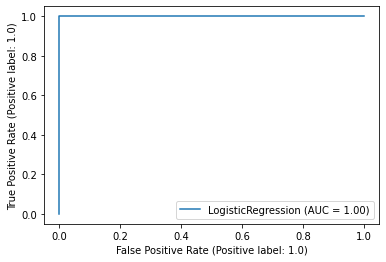

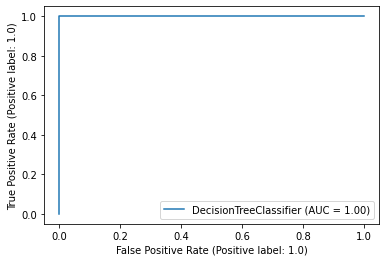

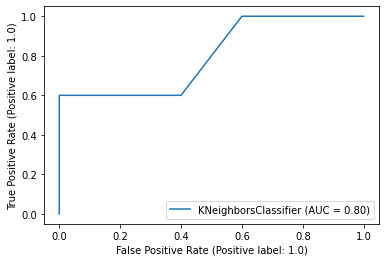

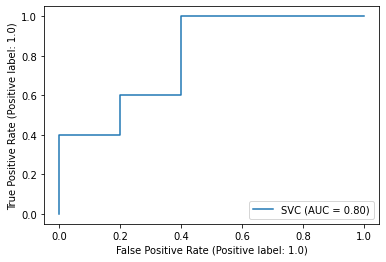

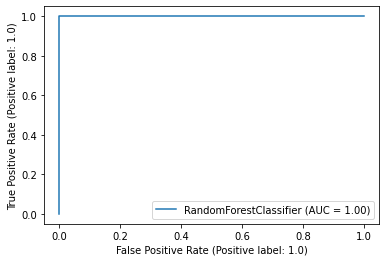

In [64]:
# K-fold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_v1['output'].values
df_v1x=df_v1.drop(['output'], axis=1)
X = df_v1x.values
for train_index, test in kf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

lr_v1kf = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v1kf)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v1kf = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v1kf)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v1kf = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v1kf)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v1kf = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v1kf)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v1kf = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v1kf)
plot_roc_curve(rfc, X_test, y_test)

4. Utworzenie drugiego zbioru danych z mniejszą ilością kategorii.

In [65]:
df_v2 = df[['cp', 'thalachh', 'slp', 'exng', 'oldpeak', 'caa', 'output']]
df_v2 = pd.get_dummies(df_v2, columns = ['exng','cp','slp'])
y = df_v2['output'].values
df_v2x = df_v2.drop(['output'], axis=1)
X = df_v2x.values

5. Zostosowanie wybranych modeli predykcyjnych do drugiego zbioru danych.

       Accuracy        F1   Recall
train   0.87108  0.881029  0.88961
test    0.90000  0.909091  1.00000
       Accuracy        F1    Recall
train  0.958188  0.960784  0.954545
test   1.000000  1.000000  1.000000
       Accuracy        F1    Recall
train  0.773519  0.792332  0.805195
test   0.600000  0.600000  0.600000
       Accuracy        F1    Recall
train   0.69338  0.739645  0.811688
test    0.70000  0.727273  0.800000
       Accuracy        F1    Recall
train  0.937282  0.942675  0.961039
test   1.000000  1.000000  1.000000


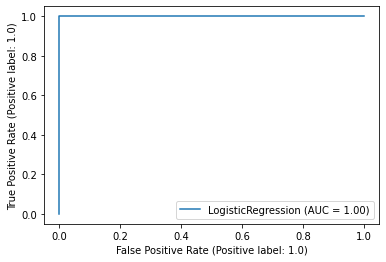

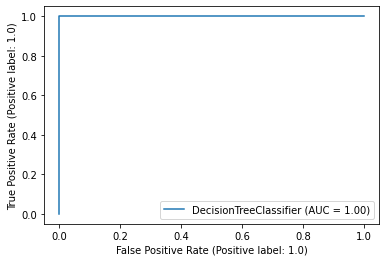

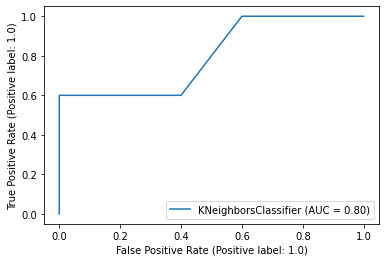

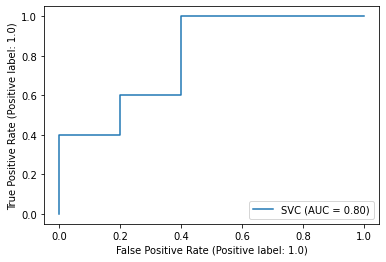

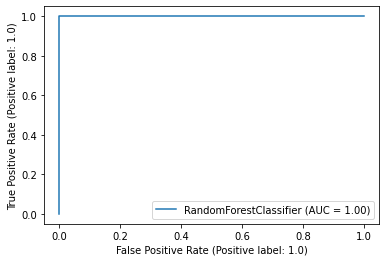

In [66]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

lr_v2 = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v2)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v2 = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v2)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v2 = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v2)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v2 = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v2)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v2 = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v2)
plot_roc_curve(rfc, X_test, y_test)

6. Zostosowanie wybranych modeli predykcyjnych wraz z kroswalidacją stratyfikowaną do drugiego zbioru danych.

       Accuracy        F1    Recall
train  0.828767  0.845679  0.861635
test   0.800000  0.833333  1.000000
       Accuracy        F1    Recall
train  0.958904  0.961290  0.937107
test   0.700000  0.727273  0.800000
       Accuracy        F1    Recall
train  0.777397  0.810496  0.874214
test   0.600000  0.666667  0.800000
       Accuracy        F1    Recall
train  0.695205  0.747875  0.830189
test   0.700000  0.727273  0.800000
       Accuracy        F1    Recall
train  0.910959  0.921687  0.962264
test   0.800000  0.833333  1.000000


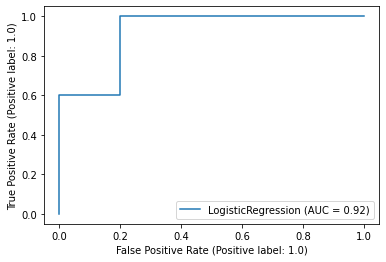

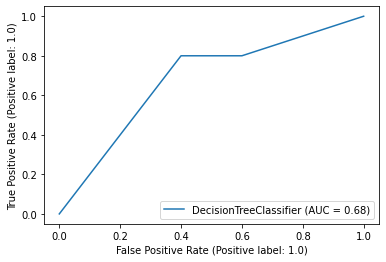

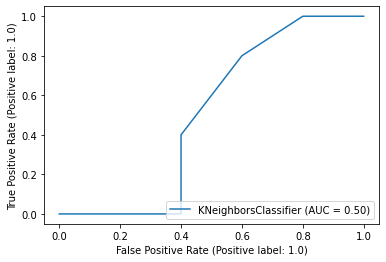

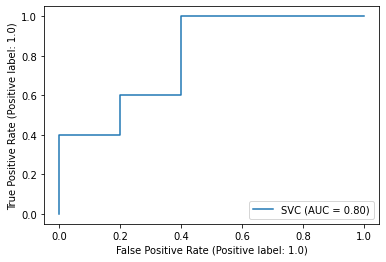

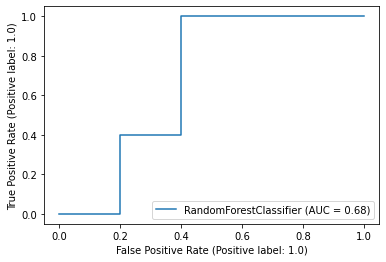

In [67]:
# Kroswalidacja stratyfikowana
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

lr_v2cv = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v2cv)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v2cv = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v2cv)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v2cv = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v2cv)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v2cv = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v2cv)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v2cv = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v2cv)
plot_roc_curve(rfc, X_test, y_test)

       Accuracy        F1    Recall
train  0.805147  0.827362  0.858108
test   0.900000  0.903226  0.875000
       Accuracy        F1    Recall
train  0.963235  0.965278  0.939189
test   0.700000  0.689655  0.625000
       Accuracy        F1    Recall
train  0.764706  0.800000  0.864865
test   0.533333  0.611111  0.687500
       Accuracy        F1    Recall
train  0.687500  0.743202  0.831081
test   0.766667  0.787879  0.812500
       Accuracy        F1    Recall
train  0.908088  0.920128  0.972973
test   0.833333  0.848485  0.875000


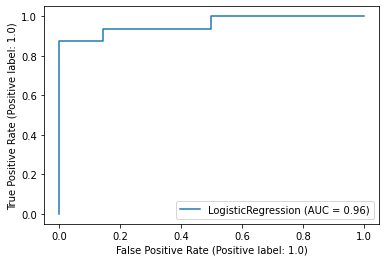

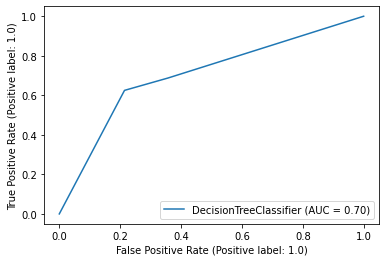

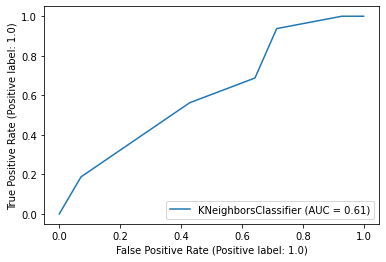

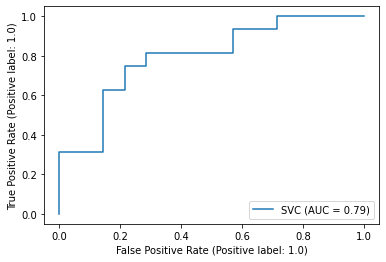

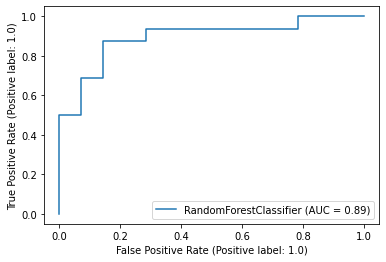

In [68]:
#Kroswalidacja stratyfikowana
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
for train_index, test_index in cv2.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

lr_v2cv2 = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v2cv2)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v2cv2 = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v2cv2)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v2cv2 = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v2cv2)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v2cv2 = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v2cv2)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v2cv2 = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v2cv2)
plot_roc_curve(rfc, X_test, y_test)

7. Zostosowanie wybranych modeli predykcyjnych wraz z kroswalidacją k-fold do
drugiego zbioru danych.

       Accuracy        F1    Recall
train    0.8223  0.838095  0.857143
test     0.9000  0.903226  0.875000
       Accuracy        F1    Recall
train  0.951220  0.953333  0.928571
test   0.933333  0.933333  0.875000
       Accuracy        F1    Recall
train  0.794425  0.821752  0.883117
test   0.833333  0.848485  0.875000
       Accuracy        F1    Recall
train  0.703833  0.749263  0.824675
test   0.766667  0.787879  0.812500
       Accuracy        F1    Recall
train  0.919861  0.927900  0.961039
test   0.933333  0.933333  0.875000


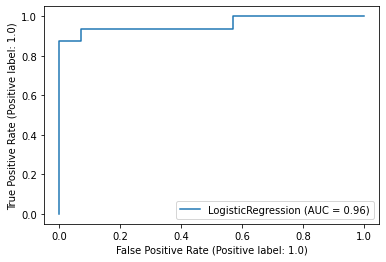

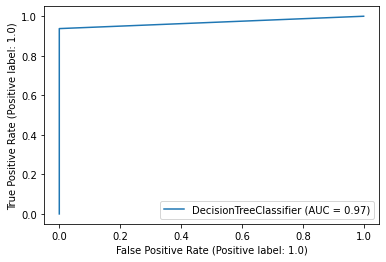

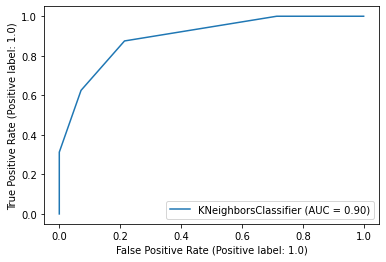

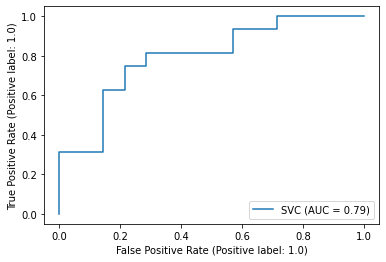

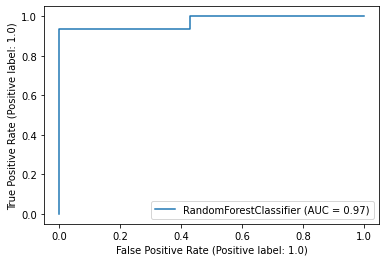

In [69]:
# K-fold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_v2['output'].values
df_v1x=df_v2.drop(['output'], axis=1)
X = df_v2x.values
for train_index, test in kf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

lr_v2kf = calculate_metrics (X_train, X_test, y_train, y_test, lr)
print(lr_v2kf)
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

clf_v2kf = calculate_metrics (X_train, X_test, y_train, y_test, clf)
print(clf_v2kf)
plot_roc_curve(clf, X_test, y_test)

#knn
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

knn_v2kf = calculate_metrics (X_train, X_test, y_train, y_test, knn)
print(knn_v2kf)
plot_roc_curve(knn, X_test, y_test)

#svm
svm = SVC()
svm.fit(X_train,y_train)

svm_v2kf = calculate_metrics (X_train, X_test, y_train, y_test, svm)
print(svm_v2kf)
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)

rfc_v2kf = calculate_metrics (X_train, X_test, y_train, y_test, rfc)
print(rfc_v2kf)
plot_roc_curve(rfc, X_test, y_test)

#PODSUMOWANIE OTRZYMANYCH WYNIKÓW

In [70]:
print('Wyniki wersji pierwszej: \n', 'Regresja logiczna: \n', lr_v1, '\n', 'Drzewo decyzyjne: \n', clf_v1, '\n', 'K-najbliższych sąsiadów: \n',
      knn_v1, '\n', 'SVM: \n', svm_v1, '\n', 'Random forest: \n', rfc_v1, '\n', 'Wyniki wersji pierwszej z kroswalidacją stratyfikowaną:\n', 'Regresja logiczna: \n', lr_v1cv, '\n', 'Drzewo decyzyjne: \n', clf_v1cv, '\n', 'K-najbliższych sąsiadów: \n',
      knn_v1cv, '\n', 'SVM: \n', svm_v1cv, '\n', 'Random forest: \n', rfc_v1cv, '\n', 'Wyniki wersji pierwszej z kroswalidacją k-fold:\n', 'Regresja logiczna: \n', lr_v1kf, '\n', 'Drzewo decyzyjne: \n', clf_v1kf, '\n', 'K-najbliższych sąsiadów: \n',
      knn_v1kf, '\n', 'SVM: \n', svm_v1kf, '\n', 'Random forest: \n', rfc_v1kf, 'Wyniki wersji drugiej: \n', 'Regresja logiczna: \n', lr_v2, '\n', 'Drzewo decyzyjne: \n', clf_v2, '\n', 'K-najbliższych sąsiadów: \n', knn_v2, '\n', 'SVM: \n', svm_v2,
      '\n', 'Random forest: \n', rfc_v2, '\n', 'Wyniki wersji drugiej z kroswalidacją stratyfikowaną:\n', 'Regresja logiczna: \n', lr_v2cv, '\n', 'Drzewo decyzyjne: \n', clf_v2cv, '\n', 'K-najbliższych sąsiadów: \n', knn_v2cv, '\n', 'SVM: \n', svm_v2cv,
      '\n', 'Random forest: \n', rfc_v2cv, '\n', 'Wyniki wersji drugiej z kroswalidacją stratyfikowaną ze zmienionymi wartościami:\n', 'Regresja logiczna: \n', lr_v2cv2, '\n', 'Drzewo decyzyjne: \n', clf_v2cv2, '\n', 'K-najbliższych sąsiadów: \n',
      knn_v2cv2, '\n', 'SVM: \n', svm_v2cv2, '\n', 'Random forest: \n', rfc_v2cv2, '\n', 'Wyniki wersji drugiej z kroswalidacją k-fold:\n', 'Regresja logiczna: \n', lr_v2kf, '\n', 'Drzewo decyzyjne: \n', clf_v2kf, '\n', 'K-najbliższych sąsiadów: \n',
      knn_v2kf, '\n', 'SVM: \n', svm_v2kf, '\n', 'Random forest: \n', rfc_v2kf,)

Wyniki wersji pierwszej: 
 Regresja logiczna: 
        Accuracy        F1    Recall
train  0.858921  0.871212  0.884615
test   0.885246  0.895522  0.882353 
 Drzewo decyzyjne: 
        Accuracy        F1    Recall
train  0.958506  0.960630  0.938462
test   0.786885  0.793651  0.735294 
 K-najbliższych sąsiadów: 
        Accuracy        F1    Recall
train  0.738589  0.765799  0.792308
test   0.622951  0.656716  0.647059 
 SVM: 
        Accuracy        F1    Recall
train  0.688797  0.742268  0.830769
test   0.721311  0.779221  0.882353 
 Random forest: 
        Accuracy        F1    Recall
train  0.937759  0.943396  0.961538
test   0.901639  0.911765  0.911765 
 Wyniki wersji pierwszej z kroswalidacją stratyfikowaną:
 Regresja logiczna: 
        Accuracy        F1   Recall
train  0.869863  0.883436  0.90566
test   0.900000  0.909091  1.00000 
 Drzewo decyzyjne: 
        Accuracy        F1    Recall
train   0.94863  0.952381  0.943396
test    0.80000  0.800000  0.800000 
 K-najbliższych s

#WNIOSKI
Najlepsze wyniki zostały osiągnięte przez model drzewa decyzyjnego zastosowany zarówno do pierwszego jak i drugiego zbioru danych. Zastosowanie kroswalidacji do tego modelu ma niewielki wpływ na jego wyniki.